In [10]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import math
from math import radians, cos, sin, asin, sqrt


In [11]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [12]:
# Firs I'm going to remove unnamed and key columns as we do not need them.
df.drop(columns = ['Unnamed: 0', 'key'], inplace= True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [13]:
# latitude and longitude = 0 is in the middle of ocean!
df = df[(df['pickup_latitude']!=0.000000)|(df['pickup_longitude']!=0.000000)|(df['dropoff_latitude']!=0.000000)|(df['dropoff_longitude']!=0.000000)]

In [14]:
# Before doing EDA wi are going to need to extract time and date infromation from pickup_datetime column

df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], utc = True)

# Now I will split date and time into two columns

df['date'] = pd.to_datetime(df['pickup_datetime']).dt.date
df['time'] = pd.to_datetime(df['pickup_datetime']).dt.time

# In this step I am going to remove pickup_datetime column
df.drop('pickup_datetime' , axis = 1,inplace=True)

df.reset_index(inplace=True)

In [15]:
df.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,time
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,2015-05-07,19:52:06
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,2009-07-17,20:04:56
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,2009-08-24,21:45:00
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,2009-06-26,08:22:21
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,2014-08-28,17:47:00


In [16]:
# Now let's convert date into days of the week, months, years  

df['day'] = df['date'].apply(lambda x: x.strftime('%A')) # day of the week like Friday
df['month'] = df['date'].apply(lambda x: x.month)
df['year'] = df['date'].apply(lambda x: x.year)

# Remove date column
df.drop('date', axis=1, inplace= True)
df.head()


,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,time,day,month,year
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19:52:06,Thursday,5,2015
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20:04:56,Friday,7,2009
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21:45:00,Monday,8,2009
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,08:22:21,Friday,6,2009
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17:47:00,Thursday,8,2014


In [17]:
df.isna().sum()

index                0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
time                 0
day                  0
month                0
year                 0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
# Now let's convert time into morning, afternoon, night and mid-night

def date_splitter(times):
    output = ''
    if dt.time(6,0,0) <= times <= dt.time(11,59,59):
        output = 'morning'
    elif dt.time(12,0,0) <= times <= dt.time(17,59,59):
        output = 'evening'
    elif dt.time(18,0,0) <= times <= dt.time(23,59,59):
        output = 'night'
    elif dt.time(0,0,1) <= times <= dt.time(5,59,59):
        output = 'mid-night'
    return output

In [20]:
df['day-time'] = df.time.apply(date_splitter)
df = df[df['day-time'] != '']
df.drop('time', inplace=True, axis=1)

df.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day-time
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening


In [21]:
def calculate_distance(lat1, lat2, lon1, lon2):
	
	# The math module contains a function named
	# radians which converts from degrees to radians.
	lon1 = radians(lon1)
	lon2 = radians(lon2)
	lat1 = radians(lat1)
	lat2 = radians(lat2)
	
	# Haversine formula
	dlon = lon2 - lon1
	dlat = lat2 - lat1
	a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2

	c = 2 * asin(sqrt(a))
	
	# Radius of earth in kilometers. Use 3956 for miles
	r = 6371
	
	# calculate the result
	return(c * r)
	
df['distance_travelled (KM)']= df.apply(lambda x: calculate_distance(x['pickup_latitude'],x['dropoff_latitude'],x['pickup_longitude'],x['dropoff_longitude']),axis=1)

In [22]:
df.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day-time,distance_travelled (KM)
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night,1.683323
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night,2.457590
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night,5.036377
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning,1.661683
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening,4.475450


### EDA

In [23]:
df.describe()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,month,year,distance_travelled (KM)
count,196336.000000,196336.000000,196336.000000,196336.000000,196336.000000,196336.000000,196336.000000,196336.000000,196336.000000,196336.000000
mean,99992.258755,11.351065,-73.852128,40.665184,-73.849747,40.652970,1.685076,6.281971,2011.741810,21.243081
std,57743.471896,9.817796,5.950248,5.572157,8.799090,4.168780,1.388013,3.439937,1.859123,386.509969
min,0.000000,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000,1.000000,2009.000000,0.000000
25%,49978.750000,6.000000,-73.992257,40.736310,-73.991582,40.735188,1.000000,3.000000,2010.000000,1.256803
50%,99991.500000,8.500000,-73.982087,40.753247,-73.980498,40.753700,1.000000,6.000000,2012.000000,2.161469
75%,150009.250000,12.500000,-73.968247,40.767517,-73.965212,40.768313,2.000000,9.000000,2013.000000,3.927116
max,199999.000000,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000,12.000000,2015.000000,16409.239135


In [24]:
# We can not have negative fare_amount
df = df[df['fare_amount'] > 0]
# We can not have ziro passengers
df = df[df['passenger_count'] > 0]


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195624 entries, 0 to 196412
Data columns (total 12 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   index                    195624 non-null  int64  
 1   fare_amount              195624 non-null  float64
 2   pickup_longitude         195624 non-null  float64
 3   pickup_latitude          195624 non-null  float64
 4   dropoff_longitude        195624 non-null  float64
 5   dropoff_latitude         195624 non-null  float64
 6   passenger_count          195624 non-null  int64  
 7   day                      195624 non-null  object 
 8   month                    195624 non-null  int64  
 9   year                     195624 non-null  int64  
 10  day-time                 195624 non-null  object 
 11  distance_travelled (KM)  195624 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 19.4+ MB


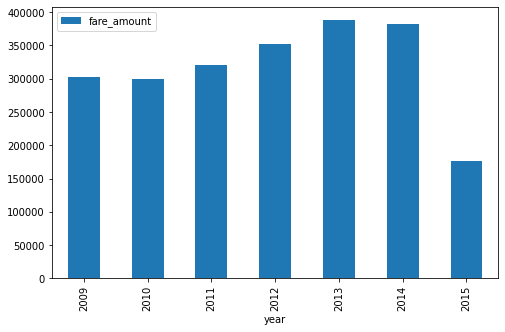

In [26]:
# fare amount against year
plt.figure(figsize=(8,5))
fare_year = df.groupby('year')['fare_amount'].sum().plot.bar(legend=True)


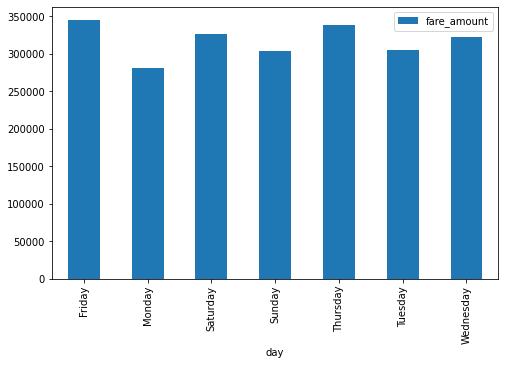

In [27]:
# fare amount against day of the week
plt.figure(figsize=(8,5))
fare_year = df.groupby('day')['fare_amount'].sum().plot.bar(legend=True)


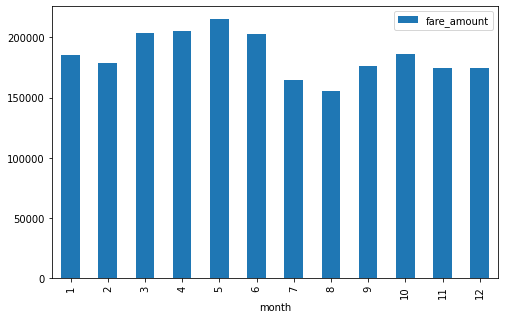

In [28]:
# fare amount against month
plt.figure(figsize=(8,5))
fare_year = df.groupby('month')['fare_amount'].sum().plot.bar(legend=True)

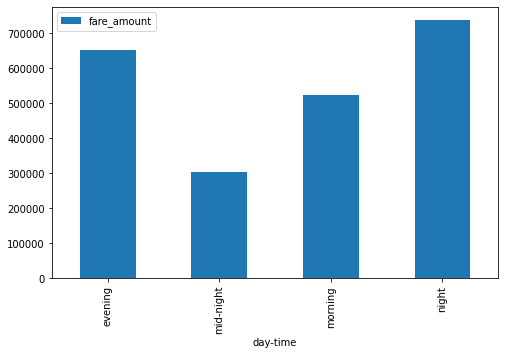

In [29]:
# fare amount against day of the week
plt.figure(figsize=(8,5))
fare_year = df.groupby('day-time')['fare_amount'].sum().plot.bar(legend=True)

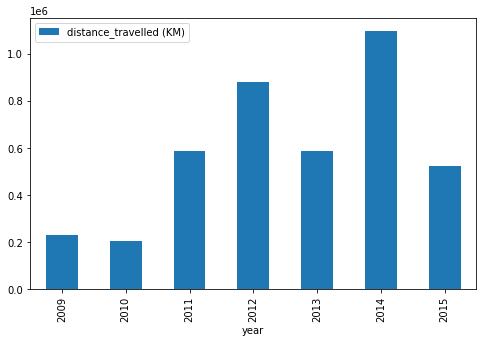

In [30]:
# Distance traveled in years
plt.figure(figsize=(8,5))
fare_year = df.groupby('year')['distance_travelled (KM)'].sum().plot.bar(legend=True)


C:\Users\msmoh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled (KM)'>

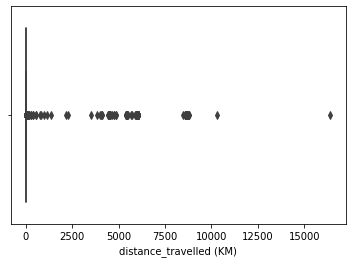

In [31]:
import seaborn as sb
sb.boxplot(df['distance_travelled (KM)'])

C:\Users\msmoh\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='distance_travelled (KM)'>

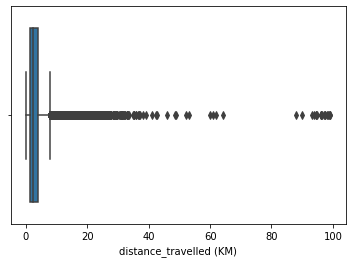

In [32]:
# Considering only fares less than 100 KM 
df = df[df['distance_travelled (KM)'] < 100]
sb.boxplot(df['distance_travelled (KM)'])

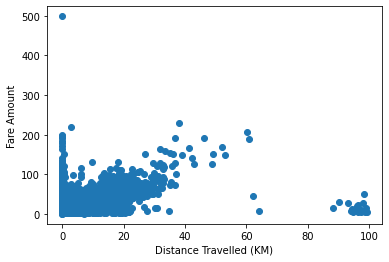

In [33]:
plt.scatter(df['distance_travelled (KM)'],df['fare_amount'])
plt.xlabel('Distance Travelled (KM)')
plt.ylabel('Fare Amount')
plt.show()

In [34]:
df.head()

,index,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,month,year,day-time,distance_travelled (KM)
0,0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,5,2015,night,1.683323
1,1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,7,2009,night,2.457590
2,2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,8,2009,night,5.036377
3,3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,6,2009,morning,1.661683
4,4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,8,2014,evening,4.475450


In [35]:
df.drop(['index','pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude'], axis =1, inplace= True)
df.head()

,fare_amount,passenger_count,day,month,year,day-time,distance_travelled (KM)
0,7.5,1,Thursday,5,2015,night,1.683323
1,7.7,1,Friday,7,2009,night,2.457590
2,12.9,1,Monday,8,2009,night,5.036377
3,5.3,3,Friday,6,2009,morning,1.661683
4,16.0,5,Thursday,8,2014,evening,4.475450


# 

In [36]:
numericals = df[['fare_amount', 'passenger_count', 'month', 'year','distance_travelled (KM)']]
categoricals = df[['day','day-time']]

In [37]:
# One hot encoding
one_hot = pd.get_dummies(categoricals)


In [38]:
df = df.join(one_hot)
df.drop(categoricals, axis = 1,inplace=True)


In [39]:
df.head()

,fare_amount,passenger_count,month,year,distance_travelled (KM),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day-time_evening,day-time_mid-night,day-time_morning,day-time_night
0,7.5,1,5,2015,1.683323,0,0,0,0,1,0,0,0,0,0,1
1,7.7,1,7,2009,2.457590,1,0,0,0,0,0,0,0,0,0,1
2,12.9,1,8,2009,5.036377,0,1,0,0,0,0,0,0,0,0,1
3,5.3,3,6,2009,1.661683,1,0,0,0,0,0,0,0,0,1,0
4,16.0,5,8,2014,4.475450,0,0,0,0,1,0,0,1,0,0,0


In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaling = df[['passenger_count','month', 'year','distance_travelled (KM)']]
scaled = scaler.fit_transform(scaling)
df[['passenger_count','month', 'year','distance_travelled (KM)']] = scaled

In [41]:
df.head()

,fare_amount,passenger_count,month,year,distance_travelled (KM),day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,day-time_evening,day-time_mid-night,day-time_morning,day-time_night
0,7.5,-0.498255,-0.373362,1.750371,-0.441138,0,0,0,0,1,0,0,0,0,0,1
1,7.7,-0.498255,0.208093,-1.472172,-0.233425,1,0,0,0,0,0,0,0,0,0,1
2,12.9,-0.498255,0.498820,-1.472172,0.458387,0,1,0,0,0,0,0,0,0,0,1
3,5.3,0.943718,-0.082634,-1.472172,-0.446943,1,0,0,0,0,0,0,0,0,1,0
4,16.0,2.385690,0.498820,1.213281,0.307907,0,0,0,0,1,0,0,1,0,0,0


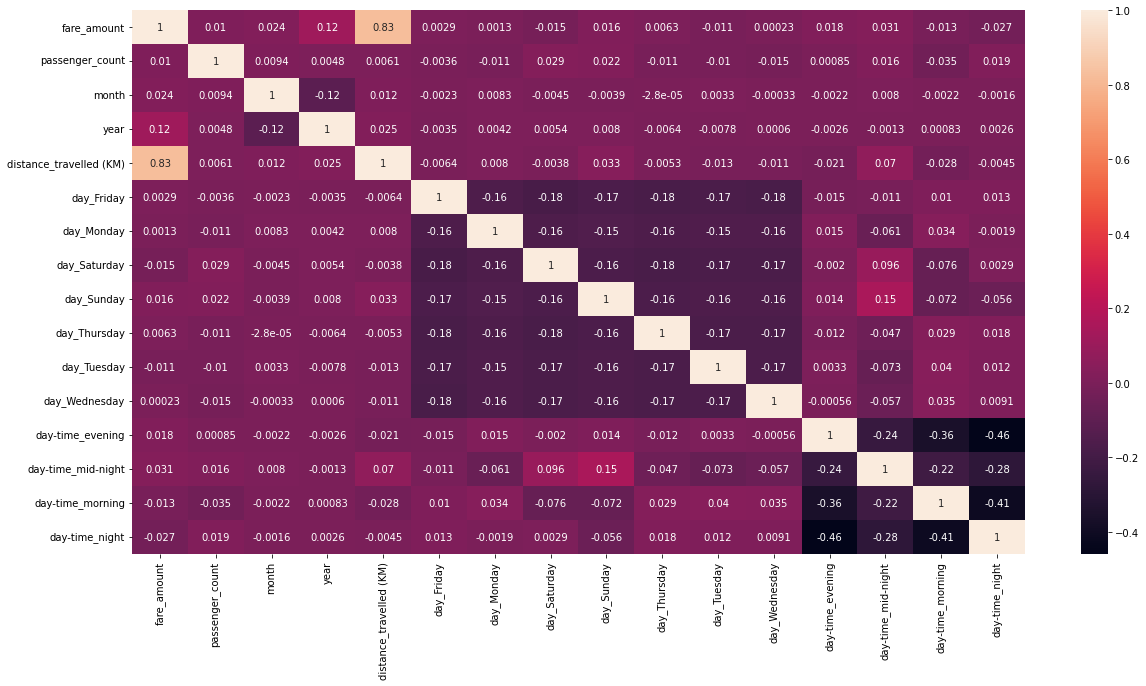

In [42]:
# Check correlation between variables
import seaborn as sns
df_cor = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_cor, annot = True)

plt.show()



In [43]:
df2 = df.copy()

In [44]:
from sklearn.model_selection import train_test_split
import numpy as np
X = df2.drop('fare_amount', axis=1)
y = df2['fare_amount']

X_main, X_evaluate, y_main , y_evaluate = train_test_split(X,y, test_size=0.2, random_state=10)
X_train,X_test,y_train,y_test= train_test_split(X_main,y_main, test_size=0.3, random_state=10)

In [60]:
df_evaluate = X_evaluate.join(y_evaluate)

In [46]:
# Linear Regression
from sklearn.linear_model import LinearRegression

reg= LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [47]:
print(f'The train accurcay of linear regression model is {reg.score(X_train,y_train)}')
print(f'The test score is {reg.score(X_test,y_test)}')

The train accurcay of linear regression model is 0.692308938318331
The test score is 0.6907827060053904


In [48]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(max_depth=5)
rf_reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=5)

In [49]:
print(f'The train accurcay of Random forest regression model is {rf_reg.score(X_train,y_train)}')
print(f'The test score is {rf_reg.score(X_test,y_test)}')

The train accurcay of Random forest regression model is 0.7803135424806393
The test score is 0.7448534020366276


In [61]:
# The second model is performing better